In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import houses as ho
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df2 = pd.read_csv('datasets/house_train_raw.csv')

In [3]:
df, numerical, cat_ord = ho.transform(df2, 0)

Mejor grado polinomial

In [4]:
error = np.zeros((10,1))

for i in range(1,11):
    # get the locations
    
    X = df.drop(columns='SalePrice', axis=1).copy()
    # Aplicamos normalizacion de los datos
    X.loc[:, numerical], mu, sigma = ho.featureNormalize(X.loc[:,numerical])

    #X = df.loc[:, numerical+cat_ord]
    
    y = df.loc[:, 'SalePrice']

    grado = i
    
    for feature in numerical+cat_ord:
        X = pd.concat([X, ho.polyFeatures(X[feature],grado).loc[:,1:]], axis=1)

    # get x_train and y_train
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.4, random_state=2)


    x_t = np.array(X_train)
    y_t = np.array(y_train)


    reg = LinearRegression().fit(x_t, y_t)

    predict = reg.predict(X_val.values)

    error[i-1] = ho.rmsle(predict, y_val)

In [5]:
error

array([[0.14448587],
       [0.14780198],
       [0.14745747],
       [0.14163582],
       [0.14574742],
       [0.14200445],
       [0.14610267],
       [0.14252895],
       [0.16543332],
       [0.19250647]])

In [6]:
# get the locations
X = df.drop(columns='SalePrice', axis=1).copy()
#X = df.loc[:, numerical+cat_ord]
y = df.loc[:, 'SalePrice'].copy()

# Aplicamos normalizacion de los datos
X.loc[:, numerical], mu, sigma = ho.featureNormalize(X.loc[:,numerical])

grado = 2
for feature in numerical+cat_ord:
    X = pd.concat([X, ho.polyFeatures(X[feature],grado).loc[:,1:]], axis=1).copy()

#X['constant'] = 1

# get x_train and y_train
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=2)

x_t = np.array(X_train)
y_t = np.array(y_train)

Entrenamiento

In [7]:
reg = LinearRegression().fit(x_t, y_t)
#theta = ho.normalEqn(x_t, y_t)

In [8]:
#predict = np.matmul(X_val, theta)
predict = reg.predict(X_val.values)

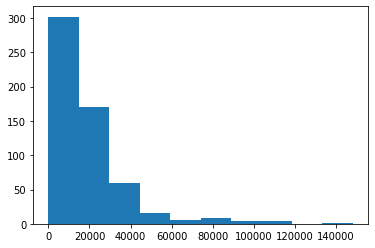

In [9]:
plt.hist(sorted(np.absolute(predict - y_val)))
plt.show()

In [10]:
ho.rmsle(predict, y_val)

0.14780198375510661

Curvas de aprendizaje

In [11]:
z = 40
m = X_train.shape[0]
j_train = np.zeros((m-z,1))
j_val = np.zeros((m-z,1))

for sample_size in range(z,m,20):

    sample_x = x_t[:sample_size,:]
    sample_y = y_t[:sample_size]

    #------------------------------------------------
    # entrenar modelo
    reg = LinearRegression().fit(sample_x, sample_y)

    # evaluar modelo en conjunto de entrenamiento y validacion.
    prediction_train = reg.predict(sample_x)
    prediction_val = reg.predict(X_val.values)
    #--------------------------------------------

    #theta = ho.normalEqn(sample_x, sample_y)
##
    ## evaluar modelo en conjunto de entrenamiento y validacion.
    #prediction_train = np.matmul(sample_x, theta)
    #prediction_val = np.matmul(X_val, theta)


    # obtener el error en los conjuntos de entrenamiento y validacion
    j_train[sample_size-z] = ho.rmsle(prediction_train, sample_y)
    j_val[sample_size-z] = ho.rmsle(prediction_val, y_val)

    

c:\Users\exort\Documents\Code\Henry\Hackathon\Hackathon-house-price\houses.py:202: RuntimeWarning: invalid value encountered in log
  z = (np.log(predict+1) - np.log(actual+1))**2
c:\Users\exort\Documents\Code\Henry\Hackathon\Hackathon-house-price\houses.py:202: RuntimeWarning: invalid value encountered in log
  z = (np.log(predict+1) - np.log(actual+1))**2
c:\Users\exort\Documents\Code\Henry\Hackathon\Hackathon-house-price\houses.py:202: RuntimeWarning: invalid value encountered in log
  z = (np.log(predict+1) - np.log(actual+1))**2


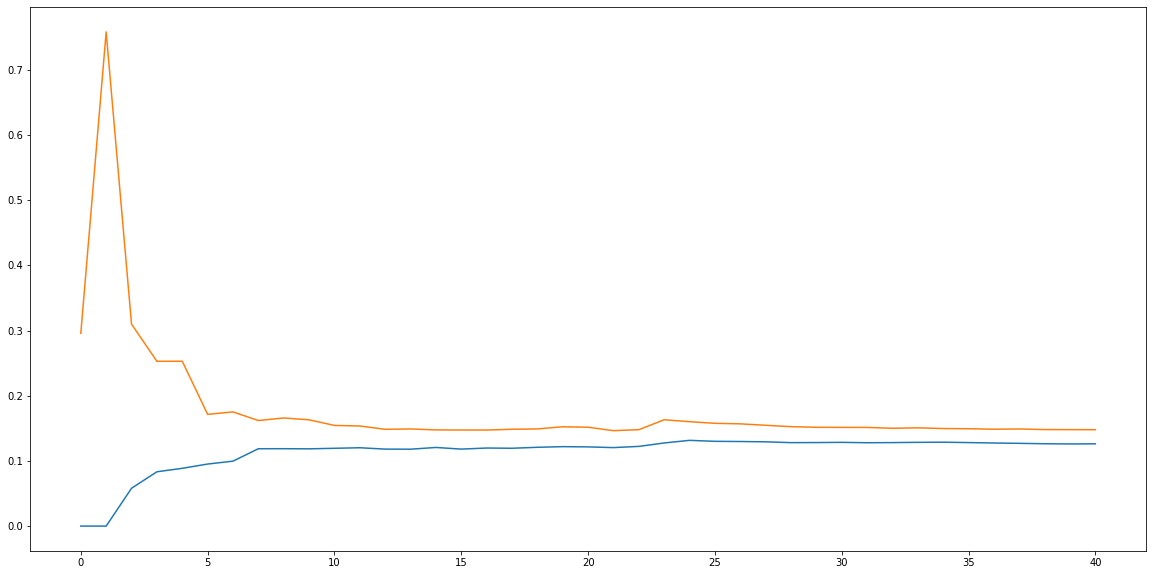

In [12]:
plt.figure(figsize=(20,10))
plt.plot(j_train[j_train!=0])
plt.plot(j_val[j_val!=0])
plt.show()

Llenar csv de test

In [17]:
test_data = pd.read_csv('datasets/houses_test_raw.csv')
test_data['SalePrice'] = 1

test, numerical, cat_ord = ho.transform(test_data, 0)
test = test.iloc[:,test.columns != 'SalePrice']

# aplicamos la normalizacion
test.loc[:,numerical] = (test.loc[:,numerical]-np.transpose(mu))/ np.transpose(sigma)

# Agregamos las variables de segundo grado
grado = 2
for feature in numerical+cat_ord:
    test = pd.concat([test, ho.polyFeatures(test[feature],grado).loc[:,1:]], axis=1).copy()

test_array = np.array(test)

In [29]:
# predict
predict = reg.predict(test_array)
# to csv
pd.DataFrame(predict, columns=['pred']).to_csv('pred_test.csv', index=False)

Experimentos

In [210]:
# https://pythonguides.com/scikit-learn-gradient-descent/
import numpy as np
import copy

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.2, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit_model(self, x, y):
        #a = 0
        #m = 7
        theta = np.random.randint(10, size=(x.shape[1],1))
        #theta = np.ones((x.shape[1],1))
        tn = copy.copy(theta)
        n = x.shape[0]
        for l in range(self.iterations):
            #a_gradient = -2 * np.sum(y - m*x + a) / n
            #m_gradient = -2 * np.sum(x*(y - (m*x + a))) / n
#
#
            #a = a + (self.learning_rate * a_gradient)
            #m = m - (self.learning_rate * m_gradient)
            
        #-------------------------------------------------------
            predicciones = np.matmul(x,theta)
            errores = predicciones - y

            for idx, feature in enumerate(x.columns):
                xn = x.loc[:, feature].values
                tn[idx] = theta[idx] + (self.learning_rate/n)*sum(errores*xn)

            theta = tn
            print(l)
        #-----------------------------------------------------
        #    predicciones = X*theta;
        #    Errores = (predicciones-y);
        #    x1 = X(:, 2);
        #    t0 = theta(1,1) - (alpha/m)*sum(Errores);
        #    t1 = theta(2,1) - (alpha/m)*sum(Errores.*x1);
        #    theta(1,1) = t0;
        #    theta(2,1) = t1;
        #------------------------------------------------

        #    predicciones = X*theta;
        #    Errores = (predicciones-y);
        #    
        #    for i=1:length(theta)
        #        xn = X(:,i);
        #        tn(i,1) = theta(i,1) - (alpha/m)*sum(Errores.*xn);
        #    end
        #    
        #    theta = tn;

        #self.m, self.a = m, a
        self.theta = theta
        
    def predict_model(self, X):
        #return self.m*X + self.a
        return np.matmul(X, self.theta)


#num.random.seed(45)
#x = num.array(sorted(list(range(5))*20)) + num.random.normal(size=100, scale=0.10)
#y = num.array(sorted(list(range(5))*20)) + num.random.normal(size=100, scale=0.20)

# get the locations
#X = df.drop(columns='SalePrice', axis=1).copy()
#X = X.TotalBsmtSF/2000
##X = df.loc[:, numerical+cat_ord]
#y = df.loc[:, 'SalePrice'].copy()/250000
#
#classifier = GradientDescentLinearRegression()
#classifier.fit_model(X, y)

# get the locations
X = df.drop(columns='SalePrice', axis=1).copy()
X = X.loc[:,numerical]
X, mu, sigma = ho.featureNormalize(X)

X['constant'] = 1
X = X.loc[:,['TotalBsmtSF', 'constant']]

#X = df.loc[:, numerical+cat_ord]
y = df.loc[:, 'SalePrice'].copy()

classifier = GradientDescentLinearRegression()
classifier.fit_model(X, y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, 'Gradient Descent Linear Regression')

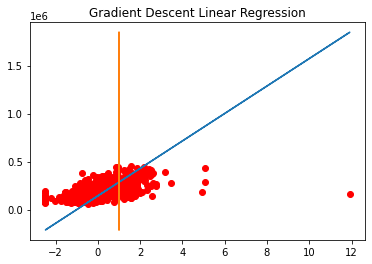

In [211]:
import matplotlib.pyplot as plt

plt.scatter(X.loc[:,'TotalBsmtSF'], y, color='red')
plt.plot(X, classifier.predict_model(X))
plt.title("Gradient Descent Linear Regression")

In [ ]:
def featureNormalize(X):
    m = X.shape[1]
    print(m)
    X_nom = X.copy()
    mu = np.zeros((m,1))
    sigma = np.zeros((m,1))
    print(X.columns)
    for idx, feature in enumerate(X.columns):
        z = X.loc[:,feature]
        y = z.mean()
        w = z.std()
        
        X_nom.loc[:,feature] = (X_nom.loc[:,feature].copy() - y)/w

        mu[idx] = y
        sigma[idx] = w

    return X_nom, mu, sigma

In [ ]:
pd.DataFrame(X.TotalBsmtSF).shape

(1432, 1)

In [ ]:
# get the locations
X = df.drop(columns='SalePrice', axis=1).copy()
X = X.loc[:,numerical]
X, mu, sigma = featureNormalize(X)

X = X.TotalBsmtSF
#X = df.loc[:, numerical+cat_ord]
y = df.loc[:, 'SalePrice'].copy()


7
Index(['Fireplaces', 'GarageCars', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')


(array([113., 900., 370.,  44.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([-2.48214402, -1.04217219,  0.39779964,  1.83777147,  3.2777433 ,
         4.71771513,  6.15768696,  7.59765879,  9.03763062, 10.47760244,
        11.91757427]),
 <BarContainer object of 10 artists>)

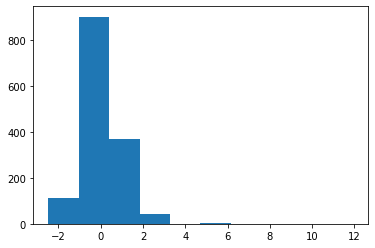

In [ ]:
plt.hist(X)